In [ ]:
# for unzip files
# import zipfile
# z = zipfile.ZipFile("archive.zip")
# z.extractall()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Définir les chemins de chaque sous-dossier
pathTumor1 = "/content/drive/MyDrive/Colab Notebooks/FSM-TP/Projets/Brain tumor classification/Dataset/tumorRealAndGenerated/generatedTumor"
pathTumor2 = "/content/drive/MyDrive/Colab Notebooks/FSM-TP/Projets/Brain tumor classification/Dataset/tumorRealAndGenerated/tumor"
pathHealthy = "/content/drive/MyDrive/Colab Notebooks/FSM-TP/Projets/Brain tumor classification/Dataset/healthy"

In [4]:
import os                        # To work with operation system commands
import cv2                       # To process images
import random                    # to generate random choices
import warnings                  # To avoid python warnings
import numpy as np               # To work with arrays
import pandas as pd              # To work with DataFrames
import seaborn as sns            # To visualizations
from tqdm import tqdm            # To represent progress bars
import matplotlib.pyplot as plt  # To visualizations

In [5]:
# ignore python warnings
warnings.filterwarnings('ignore')

# add style to plots
plt.style.use('fivethirtyeight')
sns.set_style('darkgrid')

In [9]:
Nb_Tumor1 = len(os.listdir(pathTumor1))
Nb_Tumor2 = len(os.listdir(pathTumor2))
Nb_Tumor = Nb_Tumor1 + Nb_Tumor2
Nb_Healthy = len(os.listdir(pathHealthy))

print(f' Number of Tumor Images : {Nb_Tumor}')
print(f' Number of Healthy Images : {Nb_Healthy}')
print('_'*40)
print(f' Number of All Images : {Nb_Tumor + Nb_Healthy} ')

 Number of Tumor Images : 408
 Number of Healthy Images : 408
________________________________________
 Number of All Images : 816 


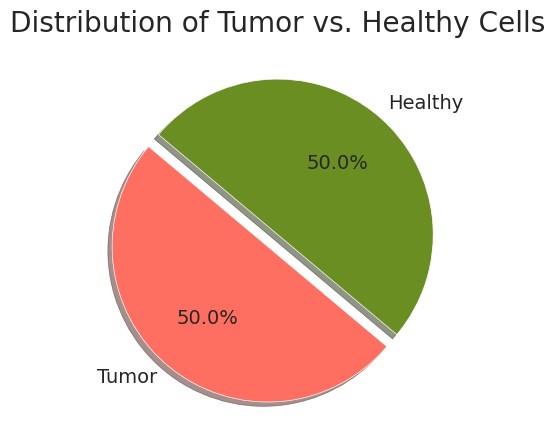

In [8]:

labels = ['Tumor', 'Healthy']
sizes = [(Nb_Tumor )/ (Nb_Tumor + Nb_Healthy), Nb_Healthy / (Nb_Tumor + Nb_Healthy)]
colors = ['#FF6F61', '#6B8E23']  # Optional colors for clarity
explode = (0.1, 0)  # "explode" the Tumor slice slightly for emphasis

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode, shadow=True)
ax.set_title("Distribution of Tumor vs. Healthy Cells")

# Display the chart
plt.show()


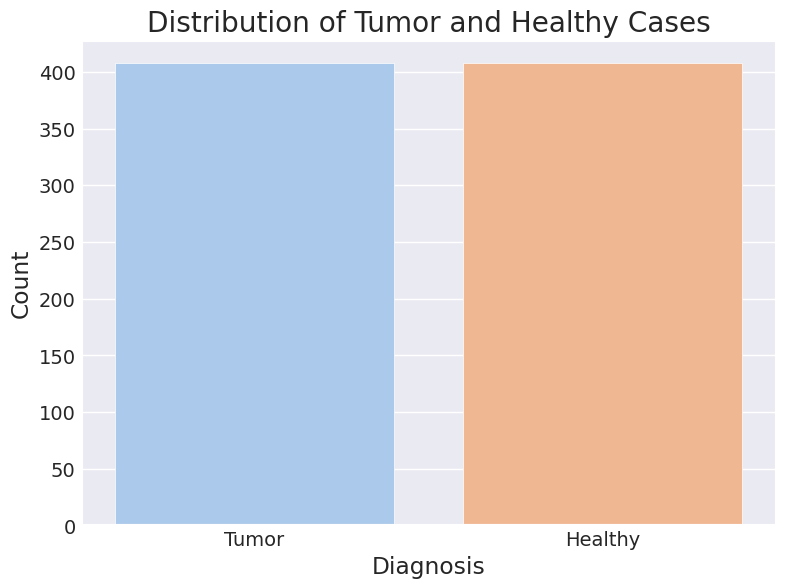

In [ ]:
# Prepare the data
listx = ["Tumor"] * Nb_Tumor + ["Healthy"] * Nb_Healthy

# Plot
plt.figure(figsize=(8, 6))
sns.countplot(x=listx, palette="pastel")
plt.title("Distribution of Tumor and Healthy Cases")
plt.xlabel("Diagnosis")
plt.ylabel("Count")

# Show plot
plt.show()

In [ ]:
def Image_Size(train_images) :
    '''
    Read images and save image-sizes in a set
    '''
    img_sizes = set()

    # Loop over train images and read them
    for img_name in tqdm(os.listdir(train_images)) :
        img_path = os.path.join(train_images, img_name)
        img = cv2.imread(img_path)
        h, w, c = img.shape
        img_sizes.add((h, w))

    return img_sizes


In [ ]:

img_sizes_Unique_Tumor = Image_Size(pathTumor)
img_sizes_Unique_Healthy = Image_Size(pathHealthy)

print("\n \t For Tumor images : ")
if len(img_sizes_Unique_Tumor) == 1 :
    print(f'All the images have size of {img_sizes_Unique_Tumor} ')
else :
    print(f'There are {len(img_sizes_Unique_Tumor)} different image sizes ! ')

print('_'*40)
print("\n \t For Healtht images : ")
if len(img_sizes_Unique_Healthy) == 1 :
    print(f'All the images have size of {img_sizes_Unique_Healthy} ')
else :
    print(f'There are {len(img_sizes_Unique_Healthy)} different image sizes ! ')

100%|██████████| 408/408 [00:05<00:00, 70.06it/s] 


 	 For Tumor images : 
All the images have size of {(128, 128)} 
________________________________________

 	 For Healtht images : 
There are 116 different image sizes ! 


In [ ]:

from sklearn.model_selection import train_test_split


# Créer les listes de chemins d'images et de labels
image_paths = []
labels = []

# Charger les images de "Tumor" avec le label 1
for filename in os.listdir(pathTumor):
    image_paths.append(os.path.join(pathTumor, filename))
    labels.append("Tumor")  # Label pour 'Tumor'

# Charger les images de "Healthy" avec le label 0
for filename in os.listdir(pathHealthy):
    image_paths.append(os.path.join(pathHealthy, filename))
    labels.append("Healthy")  # Label pour 'Healthy'

# Convertir en tableaux numpy pour faciliter la division
image_paths = np.array(image_paths)
labels = np.array(labels)


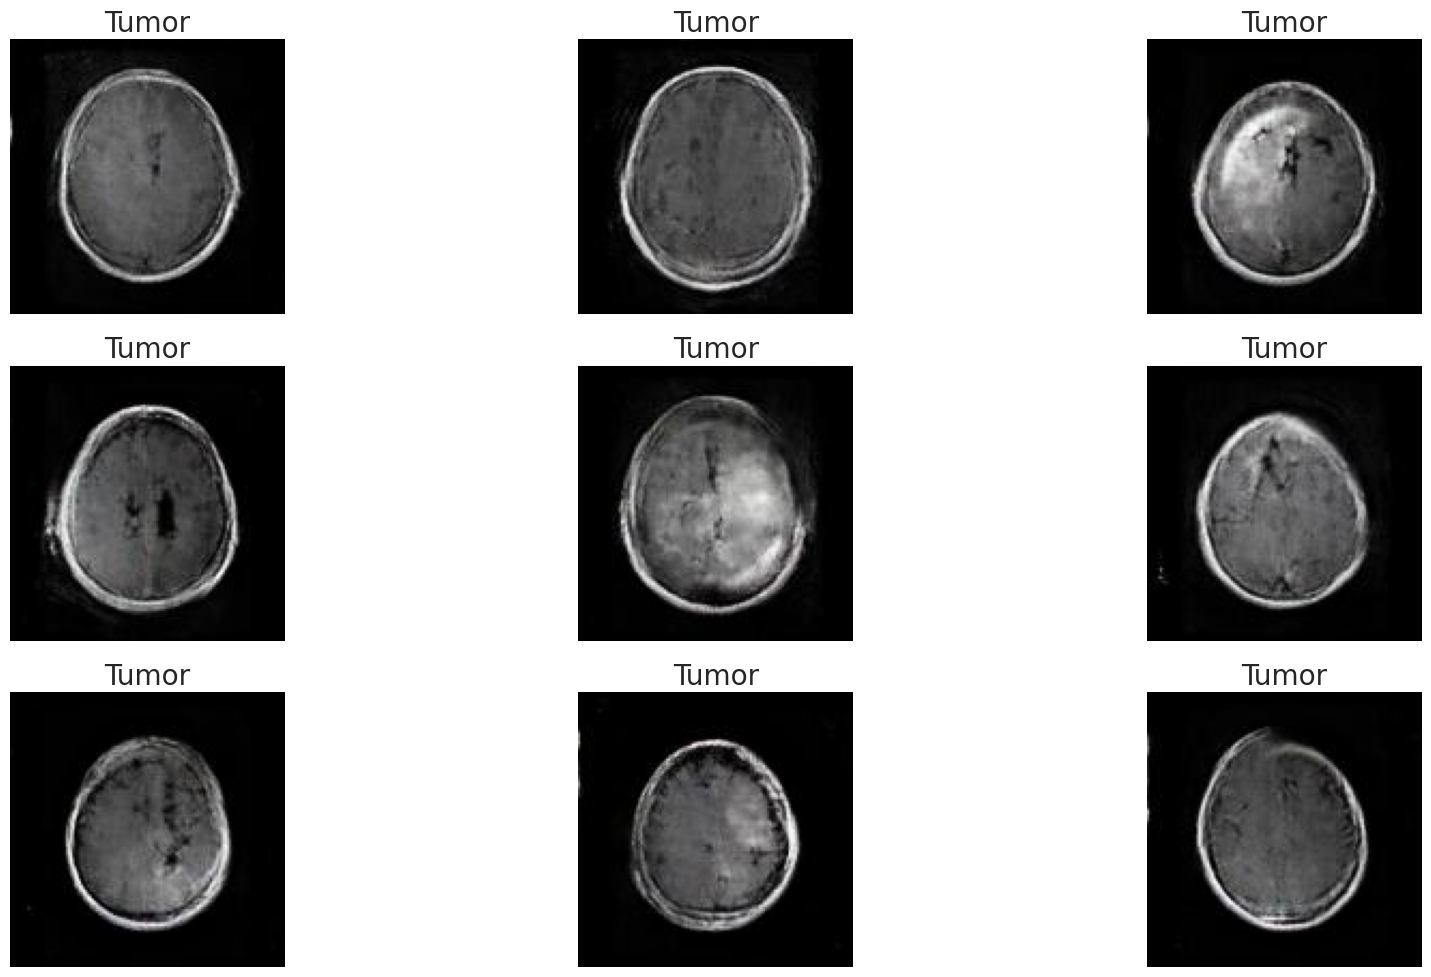

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(image_paths[i])
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    # Utiliser une expression conditionnelle pour le titre
    plt.title(labels[i])
plt.tight_layout()
plt.show()  # Assurez-vous d'afficher le graphique

In [ ]:
# Diviser en train et temp (80% train, 20% temp)
image_paths_train, image_paths_temp, labels_train, labels_temp = train_test_split(
    image_paths, labels, test_size=0.2, random_state=42, stratify=labels
)

# Diviser temp en validation et test (50% validation, 50% test)
image_paths_val, image_paths_test, labels_val, labels_test = train_test_split(
    image_paths_temp, labels_temp, test_size=0.5, random_state=42, stratify=labels_temp
)

# Résumé des tailles
print("Train size:", len(image_paths_train))
print("Validation size:", len(image_paths_val))
print("Test size:", len(image_paths_test))


Train size: 652
Validation size: 82
Test size: 82


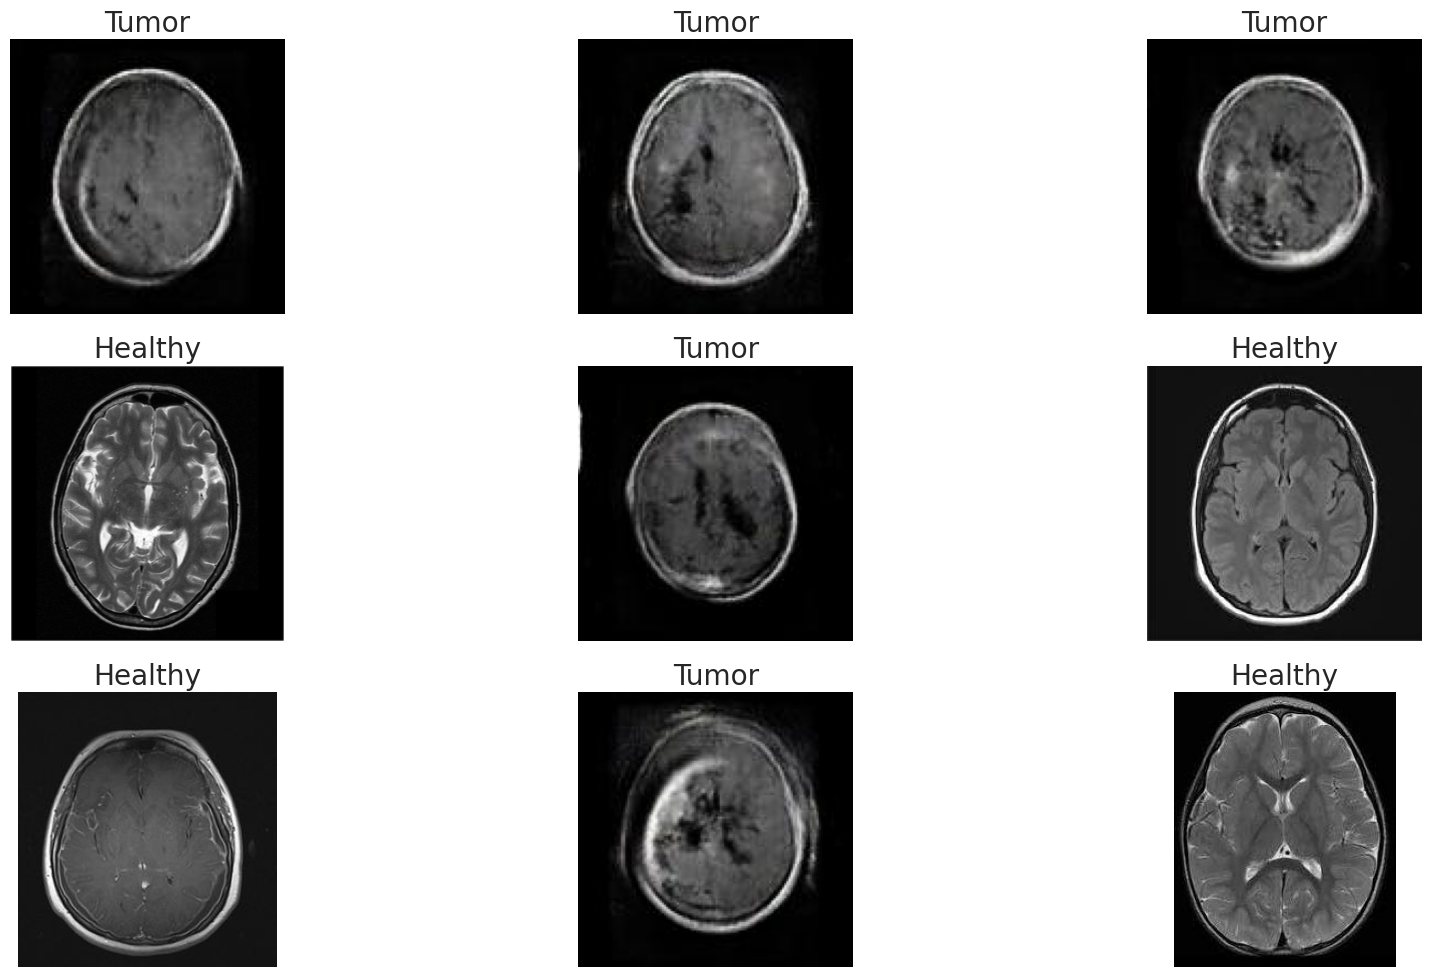

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(image_paths_train[i])
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    # Utiliser une expression conditionnelle pour le titre
    plt.title(labels_train[i])
plt.tight_layout()
plt.show()  # Assurez-vous d'afficher le graphique

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import to_categorical


# Convertir les chemins et labels en DataFrames
train_df = pd.DataFrame({'filename': image_paths_train, 'class': labels_train})
val_df = pd.DataFrame({'filename': image_paths_val, 'class': labels_val})
test_df = pd.DataFrame({'filename': image_paths_test, 'class': labels_test})


# Initialiser ImageDataGenerator
datagen = ImageDataGenerator(rescale=1.0/255)

# Générateurs pour train, validation et test
train_gen = datagen.flow_from_dataframe(train_df, x_col='filename', y_col='class',
                                        target_size=(224, 224), batch_size=32,
                                        class_mode='categorical', shuffle=True, seed=42,color_mode='rgb')
val_gen = datagen.flow_from_dataframe(val_df, x_col='filename', y_col='class',
                                      target_size=(224, 224), batch_size=32,
                                      class_mode='categorical', shuffle=True, seed=42,color_mode='rgb')
test_gen = datagen.flow_from_dataframe(test_df, x_col='filename', y_col='class',
                                       target_size=(224, 224), batch_size=32,
                                       class_mode='categorical', shuffle=False, seed=42,color_mode='rgb')

# Les labels sont déjà intégrés en fonction de la structure des dossiers
print(train_gen.class_indices)  # Affiche : {'Healthy': 0, 'Tumor': 1}


Found 652 validated image filenames belonging to 2 classes.
Found 82 validated image filenames belonging to 2 classes.
Found 82 validated image filenames belonging to 2 classes.
{'Healthy': 0, 'Tumor': 1}


In [ ]:
class_labels = train_gen.class_indices
print(class_labels)

{'Healthy': 0, 'Tumor': 1}


In [ ]:
class_name = {value:key for (key, value) in class_labels.items()}
print(class_name)

{0: 'Healthy', 1: 'Tumor'}


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, Dropout, BatchNormalization
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


In [ ]:


# Charger le modèle de base VGG19 avec des poids d'ImageNet
base_model = VGG19(input_shape=(224, 224, 3), include_top=False, weights="imagenet")

# Geler les couches de VGG19 pour conserver les caractéristiques pré-entraînées
for layer in base_model.layers:
    layer.trainable = False

# Ajouter des couches fully-connected pour la classification
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)        # Couches denses avec réduction de la taille
x = BatchNormalization()(x)                  # Normalisation pour stabiliser l'entraînement
x = Dropout(0.4)(x)

x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# Couche de sortie
output = Dense(2, activation="softmax")(x)

# Définir le modèle final
model_01 = Model(inputs=base_model.inputs, outputs=output)
model_01.summary()


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 46,247,490 (176.42 MB)

 Trainable params: 26,220,034 (100.02 MB)

 Non-trainable params: 20,027,456 (76.40 MB)

In [ ]:
# Définir le chemin avec un nom de fichier qui inclut les meilleures performances pour un suivi plus clair
filepath = "best_model_val_loss_{val_loss:.4f}.keras"

# Callbacks
es = EarlyStopping(monitor="val_loss", mode="min", patience=6, verbose=1, restore_best_weights=True)  # Augmentation de la patience et restauration des meilleurs poids
cp = ModelCheckpoint(filepath, monitor="val_loss", mode="min", save_best_only=True, save_weights_only=False, verbose=1)
lrr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=4, min_lr=1e-5, verbose=1)  # Facteur réduit et moniteur basé sur val_loss pour la stabilité de l'apprentissage

# Optimiseur avec un taux d'apprentissage ajustable et un momentum élevé
sgd = SGD(learning_rate=1e-4, momentum=0.9, nesterov=True)  # Augmentation du momentum pour une convergence plus rapide

# Compilation du modèle
model_01.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=['accuracy'])


In [ ]:

# Entraînement avec callbacks et paramètres d’entraînement améliorés
history_01 = model_01.fit(
    train_gen,
    steps_per_epoch=80,
    epochs=50,  # Augmentation des époques pour un meilleur entraînement
    callbacks=[es, cp, lrr],
    validation_data=val_gen,
    validation_steps=40
)


Epoch 1/50
21/80 ━━━━━━━━━━━━━━━━━━━━ 49s 845ms/step - accuracy: 0.7561 - loss: 0.5629
Epoch 1: val_loss improved from inf to 0.39796, saving model to best_model_val_loss_0.3980.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 45s 405ms/step - accuracy: 0.8478 - loss: 0.3567 - val_accuracy: 0.8049 - val_loss: 0.3980 - learning_rate: 1.0000e-04
Epoch 2/50
21/80 ━━━━━━━━━━━━━━━━━━━━ 9s 164ms/step - accuracy: 0.9885 - loss: 0.0385
Epoch 2: val_loss improved from 0.39796 to 0.30568, saving model to best_model_val_loss_0.3057.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.9868 - loss: 0.0392 - val_accuracy: 0.9146 - val_loss: 0.3057 - learning_rate: 1.0000e-04
Epoch 3/50
21/80 ━━━━━━━━━━━━━━━━━━━━ 9s 160ms/step - accuracy: 0.9935 - loss: 0.0233
Epoch 3: val_loss improved from 0.30568 to 0.22842, saving model to best_model_val_loss_0.2284.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.9960 - loss: 0.0197 - val_accuracy: 0.9390 - val_loss: 0.2284 - learning_rate: 1.0000e-04
Epoch 4

In [ ]:
if not os.path.isdir('model_weights/'):
    os.mkdir("model_weights/")
model_01.save(filepath="model_weights/vgg19_model_01_with_generated_data.keras", overwrite=True)

In [ ]:
model_01.load_weights("model_weights/vgg19_model_01_with_generated_data.keras")
vgg_val_eval_01 = model_01.evaluate(val_gen)
vgg_test_eval_01 = model_01.evaluate(test_gen)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 1.0000 - loss: 9.4131e-04
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - accuracy: 1.0000 - loss: 4.3722e-04


In [ ]:
print(f"Validation Loss {vgg_val_eval_01[0]}")
print(f"Validation Accuracy {vgg_val_eval_01[1]}")
print(f"Test Loss {vgg_test_eval_01[0]}")
print(f"Test Accuracy {vgg_test_eval_01[1]}")


Validation Loss 0.0010988404974341393
Validation Accuracy 1.0
Test Loss 0.00035538116935640574
Test Accuracy 1.0


In [ ]:
from PIL import Image

def get_className(classNo):
    """Retourne la classe en fonction du numéro."""
    if classNo == 0:
        return "Healthy"
    elif classNo == 1:
        return "Tumor"
    else:
        return "Unknown"

def getResult(img_path):
    """Prépare l'image et renvoie la prédiction de la classe."""
    # Charger l'image avec OpenCV
    image = cv2.imread(img_path)
    if image is None:
        raise ValueError(f"L'image n'a pas pu être chargée depuis le chemin : {img_path}")

    # Convertir en RGB et redimensionner pour le modèle
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = Image.fromarray(image)
    image = image.resize((224, 224))

    # Convertir en array et ajouter une dimension pour le batch
    input_img = np.expand_dims(np.array(image) / 255.0, axis=0)

    # Prédire la classe
    result = model_01.predict(input_img)
    class_index = np.argmax(result, axis=1)[0]
    return class_index


In [ ]:
x = 0
for i in range(80):
  if(get_className(getResult(image_paths[i])) == labels_test[i]):
    x = x+1
print(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━

In [ ]:
print(get_className(getResult(image_paths_test[5])))
print(labels_test[5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Tumor
Tumor


In [ ]:
for i in range(80):
  print(get_className(getResult(image_paths_test[i])))
  print(labels_test[i])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Tumor
Tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Healthy
Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Tumor
Tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Tumor
Tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Healthy
Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Tumor
Tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Tumor
Tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Healthy
Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Healthy
Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Tumor
Tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Tumor
Tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Tumor
Tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Healthy
Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Tumor
Tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Healthy
Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Healthy
Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Healthy
Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Healthy
Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Tumor
Tumor
1/1 ━━━━━━━━━━

In [ ]:
from google.colab import files

# Spécifiez le chemin de votre fichier
files.download('/content/model_weights/vgg19_model_01_with_generated_data.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
real_tumor_image_paths = []
real_pathTumor = "/content/drive/MyDrive/Colab Notebooks/FSM-TP/Projets/Brain tumor classification/Dataset/tumor"
# Charger les images de "Tumor" avec le label 1
for filename in os.listdir(real_pathTumor):
    real_tumor_image_paths.append(os.path.join(real_pathTumor, filename))

In [ ]:
Nb_real_Tumor = len(os.listdir(real_pathTumor))
Nb_real_Tumor

392

In [ ]:
x = 0
for i in range(Nb_real_Tumor):
  if(get_className(getResult(real_tumor_image_paths[i])) == "Tumor"):
    x = x + 1
print(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

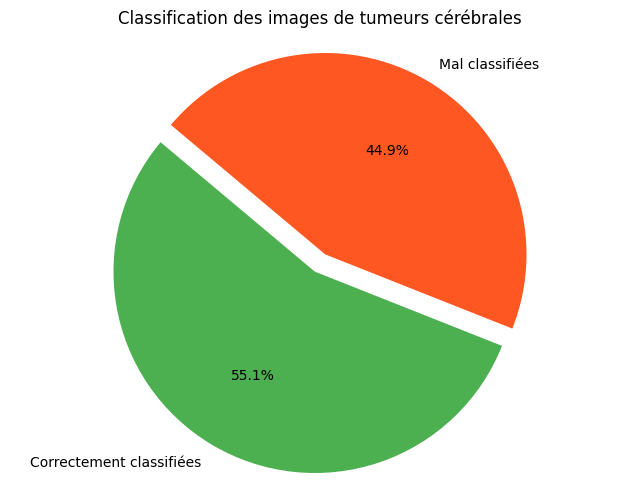

In [ ]:
import matplotlib.pyplot as plt

# Données
labels = ['Correctement classifiées', 'Mal classifiées']
sizes = [x, Nb_real_Tumor-x]
colors = ['#4CAF50', '#FF5722']  # Couleurs : vert pour correct, rouge pour incorrect
explode = (0.1, 0)  # Mettre en évidence la première catégorie

# Création du camembert
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Classification des images de tumeurs cérébrales")
plt.axis('equal')  # Assure que le graphique est bien circulaire

# Afficher le graphique
plt.show()



**Conclusion**  

Dans le cadre de ce projet, nous avons exploré la génération d'images factices de tumeurs cérébrales en utilisant, dans un premier temps, des données réelles pour entraîner le modèle, puis dans un second temps, des données synthétiques générées. Si cette approche offre un potentiel prometteur pour enrichir les bases de données et améliorer les performances des modèles dans certains contextes, elle soulève également des préoccupations importantes lorsqu'elle est appliquée à des domaines aussi sensibles que celui de la santé.  

L'incapacité du modèle à identifier correctement une tumeur cérébrale peut avoir des conséquences graves, mettant en jeu la vie des patients. Dans notre étude, seulement **55,1 %** des images ont été correctement classifiées, soit **216 images correctement identifiées sur 392**. Ce taux de réussite, bien qu'indicatif de certains progrès, demeure insuffisant pour des applications médicales où la précision est cruciale.  

Ces résultats mettent en évidence les limites actuelles des modèles s'appuyant sur des données générées, surtout lorsqu'ils sont confrontés à des enjeux critiques comme le diagnostic médical. Ils soulignent également la nécessité d'améliorer à la fois la qualité des données synthétiques et les algorithmes de classification pour atteindre des performances acceptables dans ce type de contexte.  

En conclusion, bien que la génération d'images factices constitue une piste de recherche intéressante, elle nécessite des ajustements majeurs pour répondre aux exigences élevées des applications médicales. Des études futures pourraient se concentrer sur l'amélioration des techniques de génération et sur l'intégration de mécanismes permettant d'accroître la fiabilité des prédictions.